In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
 !unzip  -q '/content/gdrive/My Drive/111880_269359_bundle_archive.zip'
 


replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!pip install tf-nightly


     |████████████████████████████████| 142.9MB 97kB/s 
     |████████████████████████████████| 460kB 45.0MB/s 
     |████████████████████████████████| 6.8MB 43.3MB/s 


In [ ]:

!pip install Keras-Preprocessing


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
import matplotlib.pyplot as plot




In [ ]:
train_ds = image_dataset_from_directory(directory='/content/seg_train/seg_train',
                                        labels='inferred',
                                        validation_split=.2,
                                        subset='training',
                                        seed=123,
                                        label_mode='categorical',
                                        batch_size=32,
                                        image_size=(150,150))





Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [ ]:

test_ds = image_dataset_from_directory(directory='/content/seg_test/seg_test',
                                        labels='inferred',
                                        label_mode='categorical',
                                        batch_size=32,
                                        image_size=(150,150))

Found 3000 files belonging to 6 classes.


In [ ]:
validation_ds = image_dataset_from_directory(directory='/content/seg_train/seg_train',
                                        labels='inferred',
                                        validation_split=.2,
                                        subset='validation',
                                        seed=123,
                                        label_mode='categorical',
                                        batch_size=32,
                                        image_size=(150,150))

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [ ]:
!pip install tflearn


     |████████████████████████████████| 102kB 2.3MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp36-none-any.whl size=128208 sha256=ee13ed742bb3a0b4885e2208d6e47716bc226bedf2a5f4c9b25101c115240d04
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


In [ ]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
trained=model.fit(train_ds, epochs=10, validation_data=validation_ds)





Epoch 1/10
351/351 [==============================] - 305s 869ms/step - loss: 0.9842 - accuracy: 0.6219 - val_loss: 0.8428 - val_accuracy: 0.6907
Epoch 2/10
351/351 [==============================] - 296s 842ms/step - loss: 0.6557 - accuracy: 0.7630 - val_loss: 0.6090 - val_accuracy: 0.7933
Epoch 3/10
351/351 [==============================] - 297s 847ms/step - loss: 0.4901 - accuracy: 0.8252 - val_loss: 0.5498 - val_accuracy: 0.8125
Epoch 4/10
351/351 [==============================] - 298s 848ms/step - loss: 0.3802 - accuracy: 0.8632 - val_loss: 0.6106 - val_accuracy: 0.7897
Epoch 5/10
351/351 [==============================] - 297s 848ms/step - loss: 0.2906 - accuracy: 0.9003 - val_loss: 0.6439 - val_accuracy: 0.8043
Epoch 6/10
351/351 [==============================] - 299s 853ms/step - loss: 0.1934 - accuracy: 0.9333 - val_loss: 0.7102 - val_accuracy: 0.8125
Epoch 7/10
351/351 [==============================] - 300s 854ms/step - loss: 0.1399 - accuracy: 0.9522 - val_loss: 1.1151 -

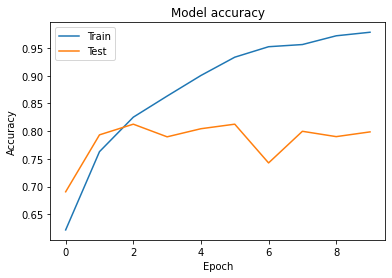

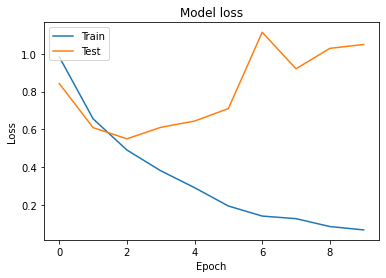

In [ ]:

plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()


In [ ]:
model.evaluate(test_ds, verbose=1)

94/94 [==============================] - 23s 246ms/step - loss: 1.0978 - accuracy: 0.7890


[1.0977929830551147, 0.7889999747276306]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


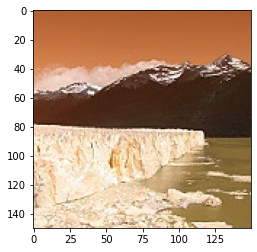

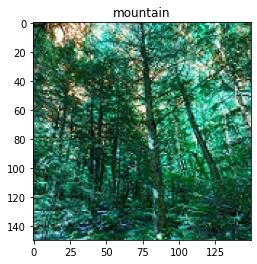

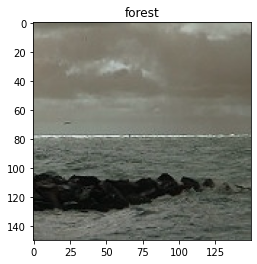

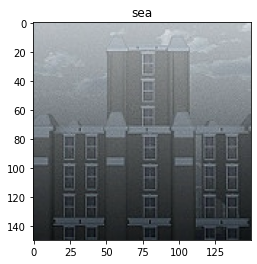

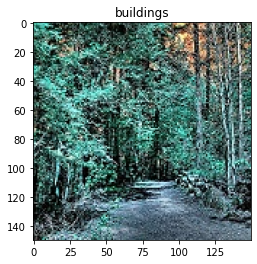

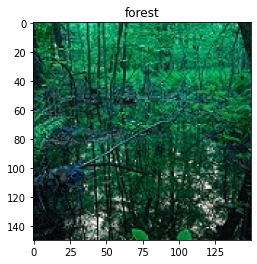

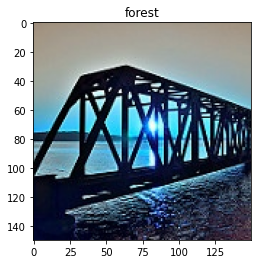

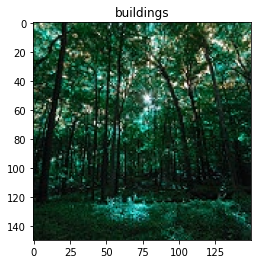

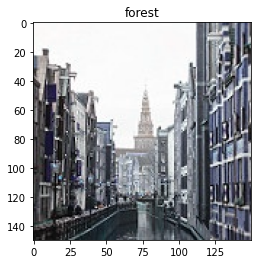

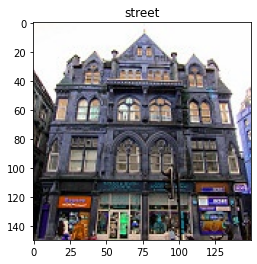

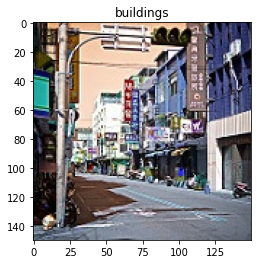

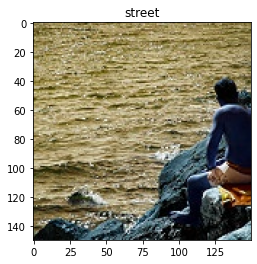

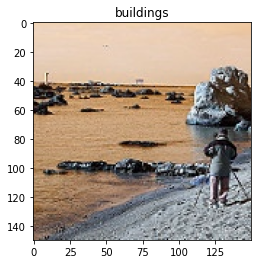

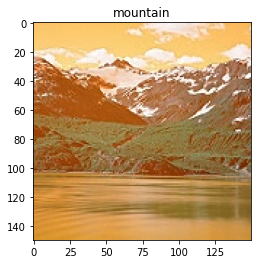

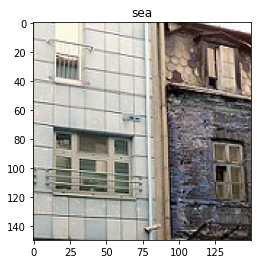

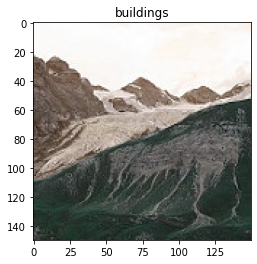

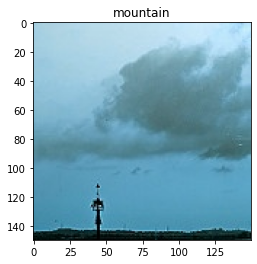

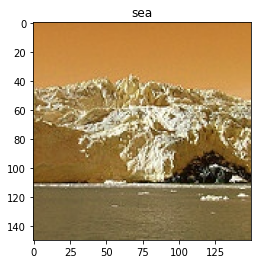

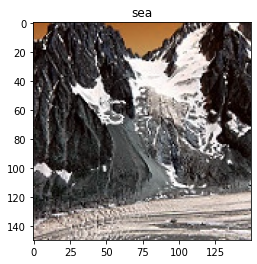

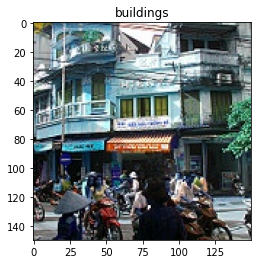

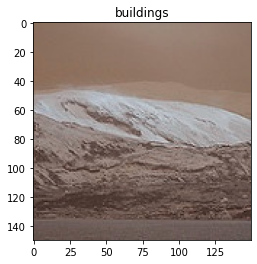

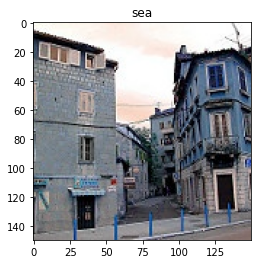

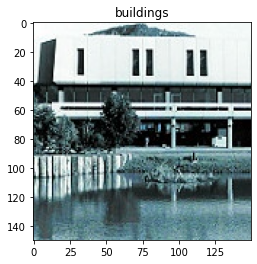

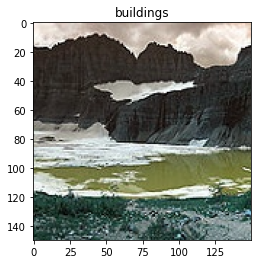

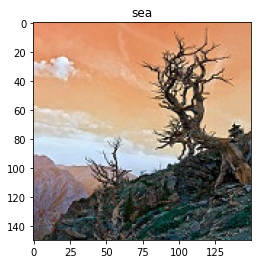

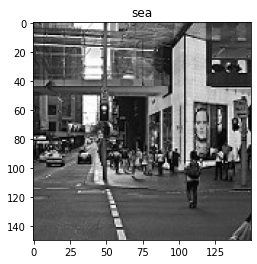

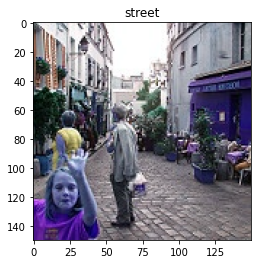

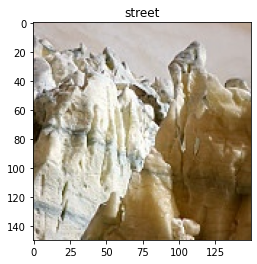

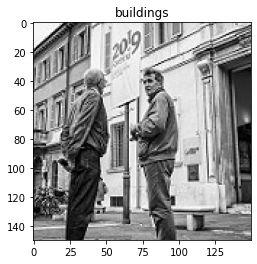

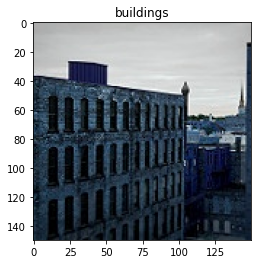

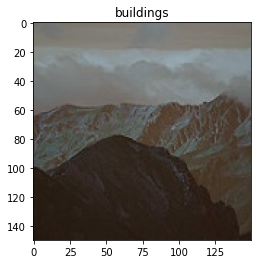

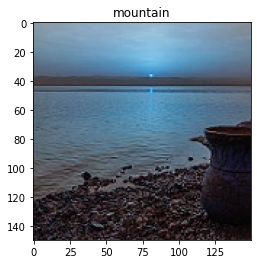

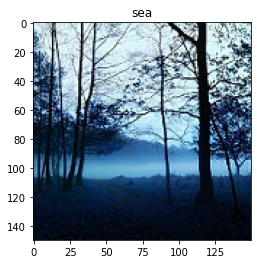

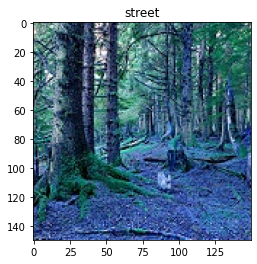

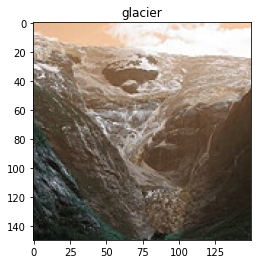

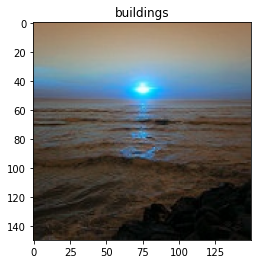

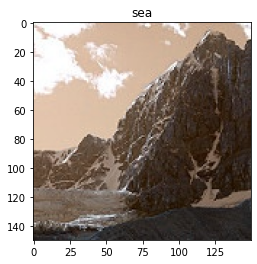

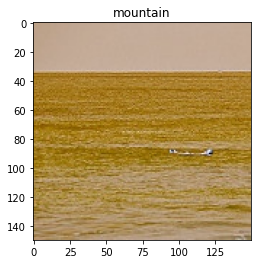

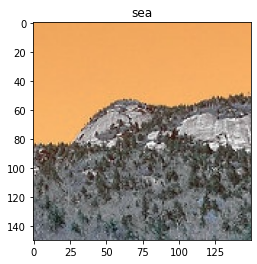

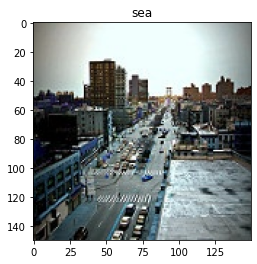

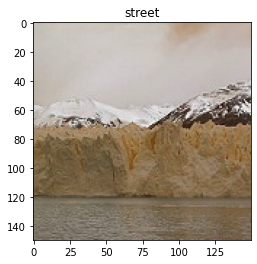

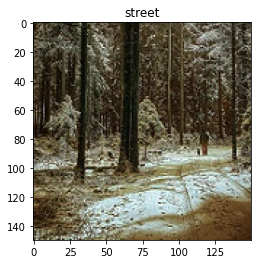

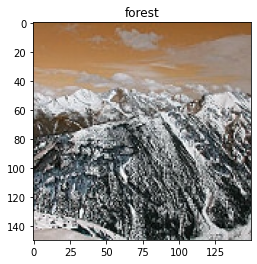

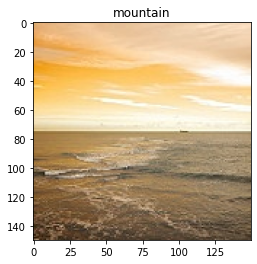

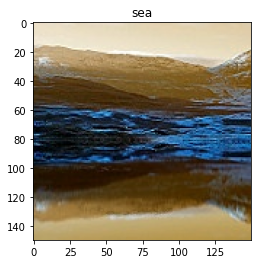

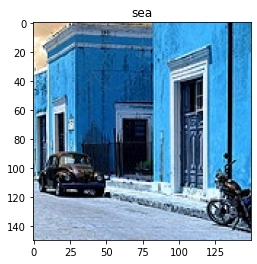

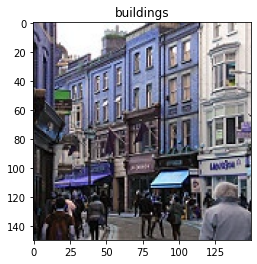

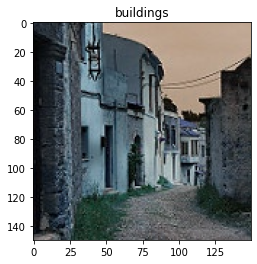

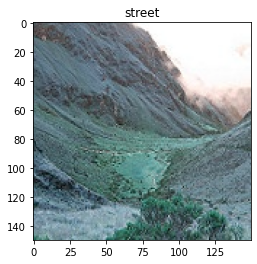

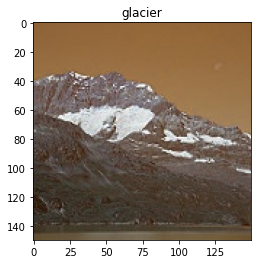

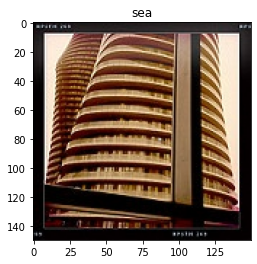

In [ ]:
#import the library opencv
import cv2


#globbing utility.
import glob
import numpy as np
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]


path = "/content/seg_pred/seg_pred/*.*"
for images in glob.glob(path):
  img = cv2.imread(images)
  img = cv2.resize(img,(150,150))
  img = np.reshape(img,[1,150,150,3])
  x=get_classlabel(model.predict_classes(img)[0])
  a = cv2.imread(images)
  plot.imshow(a)
  plot.show()
  plot.title(x)
